# Matplotlib

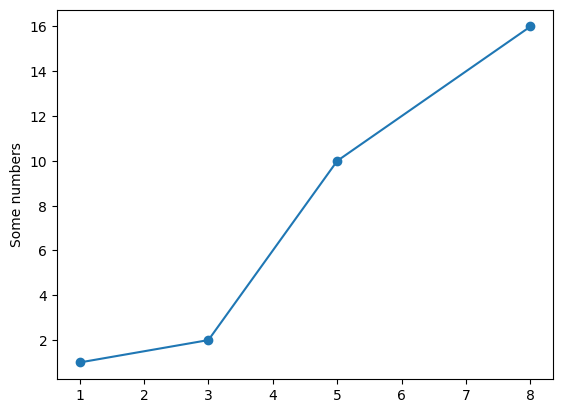

In [1]:
import matplotlib.pyplot as plt

# A simple line plot with four x,y coordinates
plt.plot([1, 3, 5, 8], [1, 2, 10, 16], marker="o")
plt.ylabel('Some numbers')
plt.show()

In [2]:
import numpy as np

# Generate data
x = np.linspace(0, 2, 100)
print("First five values: ", x[0:5])

First five values:  [0.         0.02020202 0.04040404 0.06060606 0.08080808]


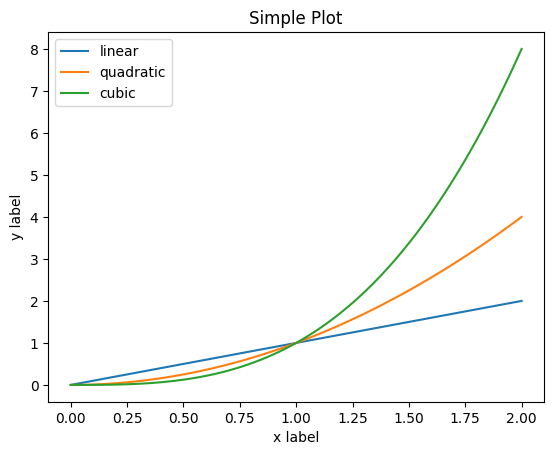

In [3]:
# Add three lines to the plot (using x as data)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

# Add labels
plt.xlabel('x label')
plt.ylabel('y label')
# Add title
plt.title("Simple Plot")
# Add legend
plt.legend()

# Create plot
plt.show()

### Scatterplot

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html 

matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None,...)

x, y : data points

s: scalar or array_like, shape (n, ); marker size in points\*\*2; default is rcParams['lines.markersize'] ** 2

c : color, sequence, or sequence of color

In [4]:
# Import csv data from url
import pandas as pd
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/boot/urine.csv')
print(df.head())
print(df.tail())

   rownames  r  gravity    ph   osmo  cond  urea  calc
0         1  0    1.021  4.91  725.0   NaN   443  2.45
1         2  0    1.017  5.74  577.0  20.0   296  4.49
2         3  0    1.008  7.20  321.0  14.9   101  2.36
3         4  0    1.011  5.51  408.0  12.6   224  2.15
4         5  0    1.005  6.52  187.0   7.5    91  1.16
    rownames  r  gravity    ph   osmo  cond  urea   calc
74        75  1    1.025  7.90  721.0  23.6   301   9.04
75        76  1    1.017  4.81  410.0  13.3   195   0.58
76        77  1    1.024  5.40  803.0  21.8   394   7.82
77        78  1    1.016  6.81  594.0  21.4   255  12.20
78        79  1    1.015  6.03  416.0  12.8   178   9.39


<class 'numpy.ndarray'>


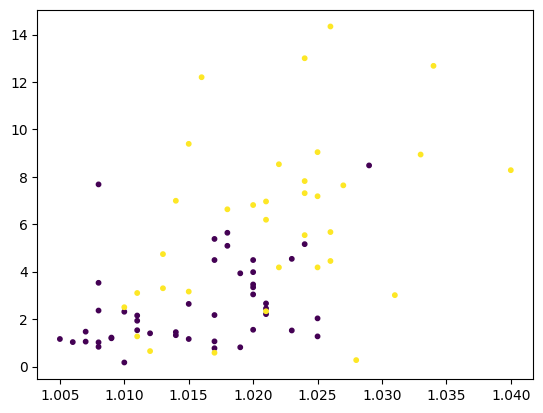

In [5]:
# Quickly plotting data
gravity = df[['gravity']]
# print(gravity)
x = df['gravity'].values
print(type(x))
y = df['calc'].values
plt.scatter(x, y, s=10, c=df['r'].values)
plt.show()

In [6]:
# A more fancy plot, first set scatter point values
x = df[['gravity']]
y = df[['calc']]

# Get unique values of "r" (presence of crystals)
uniq = list(set(df['r']))
print(uniq)

[0, 1]


In [7]:
# Set the color map to match the number of "r"
# z = range(1,len(uniq))
hot = plt.get_cmap('hot')

import matplotlib.colors as colors
# colors.Normalize linearly normalizes data into 0-1 interval
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))

import matplotlib.cm as cmx
#  ScalarMappable makes use of data normalization before returning RGBA colors from given colormap
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)
print(scalarMap)
#print(dir(scalarMap))

indx=0      True
1      True
2      True
3      True
4      True
      ...  
74    False
75    False
76    False
77    False
78    False
Name: r, Length: 79, dtype: bool
indx=0     False
1     False
2     False
3     False
4     False
      ...  
74     True
75     True
76     True
77     True
78     True
Name: r, Length: 79, dtype: bool


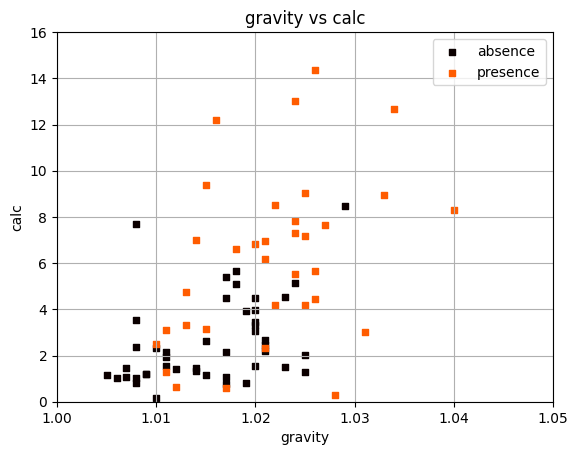

In [8]:
# Plot each point
for i in range(len(uniq)):
    indx = df['r'] == uniq[i]
    print("indx={}".format(indx))
    plt.scatter(x[indx], y[indx], s=15, 
                color=scalarMap.to_rgba(i), 
                label=(uniq[i]), marker="s")

# Add labels, limits, title, grid and legend
plt.xlabel('gravity')
plt.xlim(1.00,1.05)
plt.ylabel('calc')
plt.ylim(0,16)
plt.title('gravity vs calc')
plt.grid(True)
# Grid lines bg: plt.rc()

# Legend uses labels from plt.scatter(label=)
plt.legend(['absence', 'presence'])

# After plt.show() is called new figure is created
# so save figure before show() by calling "get current figure"
plt_fig = plt.gcf()
plt.show()

# Save figure
plt_fig.savefig("urine-scatterplot.jpg", dpi=150)
plt_fig.savefig("urine-scatterplot.pdf", dpi=600)

### Boxplot

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

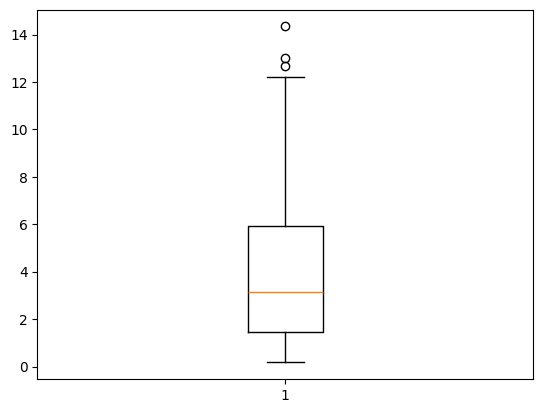

In [9]:
## Basic boxplot of variable (column in df)
plt.boxplot(df["calc"])
plt.show()

<class 'list'>
[array([2.45, 4.49, 2.36, 2.15, 1.16, 3.34, 1.4 , 8.48, 1.16, 2.21, 1.93,
       1.27, 1.03, 1.47, 1.53, 5.09, 1.05, 2.03, 7.68, 1.45, 5.16, 0.81,
       1.32, 1.55, 1.52, 0.77, 2.17, 0.17, 0.83, 3.04, 1.06, 3.93, 5.38,
       3.53, 4.54, 3.98, 1.02, 3.46, 1.19, 5.64, 2.66, 1.22, 2.64, 2.31,
       4.49], dtype=float32), array([ 6.96, 13.  ,  5.54,  6.19,  7.31, 14.34,  4.74,  2.5 ,  1.27,
        4.18,  3.1 ,  3.01,  6.81,  8.28,  2.33,  7.18,  5.67, 12.68,
        8.94,  3.16,  3.3 ,  6.99,  0.65,  4.18,  4.45,  0.27,  7.64,
        6.63,  8.53,  9.04,  0.58,  7.82, 12.2 ,  9.39], dtype=float32)]


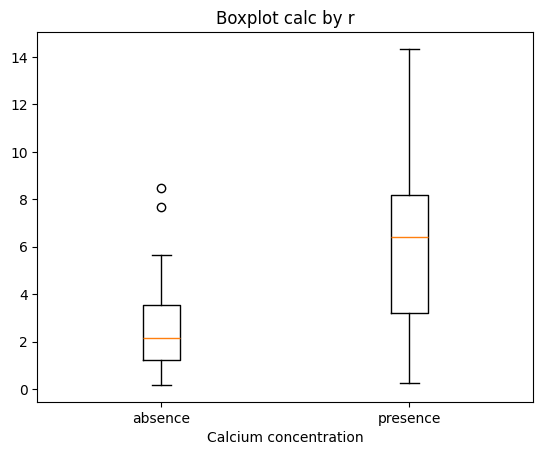

In [11]:
## By presence of crystals (r column)
# Data needs to be list of arrays as input for creating boxplot
# Making 2-D array only works if all columns are same length
# If not then use list instead (more efficient)
# Boxplot converts 2-D array into list of vectors internally anyway
df_r0 = df[ df['r']==0 ]
df_r1 = df[ df['r']==1 ]
# Will not work: data = [df_r0[['calc']], df_r1[['calc']]]
data = [np.float32(df_r0[['calc']]).flatten(),
         np.float32(df_r1[['calc']]).flatten()]
# https://stackoverflow.com/questions/54649787/how-to-fix-x-must-have-2-or-fewer-dimensions-error-in-pyplot-from-matplotlib-u
print(type(data))
print(data)

# Create boxplot
plt.boxplot(data, 
            # vert=False, showfliers=False, 
            labels=(['absence', 'presence']))
plt.title("Boxplot calc by r")
plt.xlabel("Calcium concentration");
# ; at end of previous line to hide output

# Bokeh

In [ ]:
# Standard imports
# pip install --user bokeh
from bokeh.io import output_notebook, show
# Tell Bokeh where to generate output: output_notebook() for use in Jupyter notebooks
output_notebook()
# Other option:using output_file() with filename "lines.html"

### Complex barplot with intearctive hover
Example from tutorial on: https://mybinder.org/v2/gh/bokeh/bokeh-notebooks/master

In [ ]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, reset_output
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(width=800, height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))
# Use reset_output() before next output_notebook or output_file to switch between them
# Uncomment next two lines if you previously
# reset_output()
# output_notebook()
show(p)

### Plot of periodic elements
Example from https://bokeh.pydata.org/en/latest/docs/gallery/elements.html

In [ ]:
import pandas as pd

from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.periodic_table import elements

elements = elements.copy()
elements = elements[elements["atomic number"] <= 82]
elements = elements[~pd.isnull(elements["melting point"])]
mass = [float(x.strip("[]")) for x in elements["atomic mass"]]
elements["atomic mass"] = mass

#print(elements)
print(elements[~pd.isnull(elements["melting point"])])

In [ ]:
palette = ["#053061", "#2166ac", "#4393c3", "#92c5de", "#d1e5f0",
           "#f7f7f7", "#fddbc7", "#f4a582", "#d6604d", "#b2182b", "#67001f"]

melting_points = elements["melting point"]
low = min(melting_points)
high = max(melting_points)
melting_point_inds = [int(10*(x-low)/(high-low)) for x in melting_points] #gives items in colors a value from 0-10
elements['melting_colors'] = [palette[i] for i in melting_point_inds]

TITLE = "Density vs Atomic Weight of Elements (colored by melting point)"
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"

p = figure(tools=TOOLS, toolbar_location="above", width=1200, title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "atomic weight (amu)"
p.yaxis.axis_label = "density (g/cm^3)"
p.grid.grid_line_color = "white"
p.hover.tooltips = [
    ("name", "@name"),
    ("symbol:", "@symbol"),
    ("density", "@density"),
    ("atomic weight", "@{atomic mass}"),
    ("melting point", "@{melting point}")
]

source = ColumnDataSource(elements)

p.circle("atomic mass", "density", size=12, source=source,
         color='melting_colors', line_color="black", fill_alpha=0.8)

labels = LabelSet(x="atomic mass", y="density", text="symbol", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)

# Also show as elements.html file
output_file("elements.html", title="elements.py example")

show(p)

### Heatmap showing unemployment in US (1946-2016)
Example from https://bokeh.pydata.org/en/latest/docs/gallery/unemployment.html

In [ ]:
from math import pi
import pandas as pd

from bokeh.io import show
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data

data['Year'] = data['Year'].astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'

years = list(data.index)
months = list(data.columns)

# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, low=df.rate.min(), high=df.rate.max())

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="US Unemployment ({0} - {1})".format(years[0], years[-1]),
           x_range=years, y_range=list(reversed(months)),
           x_axis_location="above", width=900, height=400,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('date', '@Month @Year'), ('rate', '@rate%')])

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Year", y="Month", width=1, height=1,
       source=df,
       fill_color={'field': 'rate', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="10pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

# Reset to prevent overwriting previous .html
reset_output()
output_notebook()

show(p)